In [752]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage

#Load the CSV file into a DataFrame
df = pd.read_csv('Customer_Feedback_Data.csv') 


In [754]:
df.head()

Customer_ID  Satisfaction_Score  Feedback_Comments  Likelihood_to_Recommend
0            1                10.0     Very satisfied                        9
1            2                 3.0     Very satisfied                        3
2            3                10.0     Very satisfied                        1
3            4                 7.0  Needs improvement                        4
4            5                 8.0     Unsatisfactory                        7

In [756]:
print(df.count())

Customer_ID                5050
Satisfaction_Score         4949
Feedback_Comments          5050
Likelihood_to_Recommend    5050
dtype: int64


In [758]:
df['Satisfaction_Score'] = df['Satisfaction_Score'].fillna(5)
df.head()

Customer_ID  Satisfaction_Score  Feedback_Comments  Likelihood_to_Recommend
0            1                10.0     Very satisfied                        9
1            2                 3.0     Very satisfied                        3
2            3                10.0     Very satisfied                        1
3            4                 7.0  Needs improvement                        4
4            5                 8.0     Unsatisfactory                        7

In [760]:
print(df.count())

Customer_ID                5050
Satisfaction_Score         5050
Feedback_Comments          5050
Likelihood_to_Recommend    5050
dtype: int64


In [762]:
df.describe()

Customer_ID  Satisfaction_Score  Likelihood_to_Recommend
count  5050.000000         5050.000000              5050.000000
mean    501.949703            5.671089                 5.571287
std     288.806331            3.571544                 2.872577
min       1.000000            1.000000                 1.000000
25%     253.000000            3.000000                 3.000000
50%     502.000000            6.000000                 6.000000
75%     751.750000            8.000000                 8.000000
max    1000.000000           60.000000                10.000000

In [764]:
df.drop('Feedback_Comments', axis=1, inplace=True)

df.to_csv('Customer_Feedback_Data_NEW.csv', index=False)
df.head()

Customer_ID  Satisfaction_Score  Likelihood_to_Recommend
0            1                10.0                        9
1            2                 3.0                        3
2            3                10.0                        1
3            4                 7.0                        4
4            5                 8.0                        7

In [766]:
print(df.isna().sum())

Customer_ID                0
Satisfaction_Score         0
Likelihood_to_Recommend    0
dtype: int64


In [768]:
print(df.count())

Customer_ID                5050
Satisfaction_Score         5050
Likelihood_to_Recommend    5050
dtype: int64


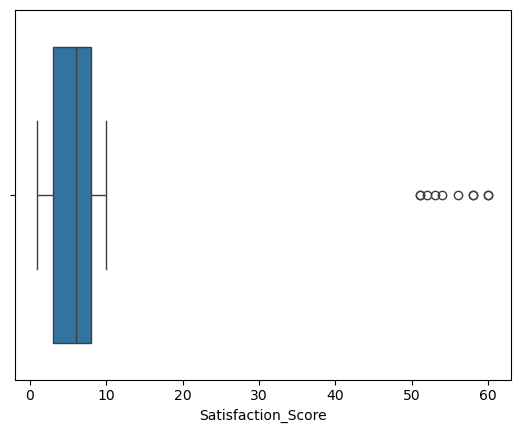

In [770]:
sns.boxplot(x=df['Satisfaction_Score'])
plt.show()

In [772]:
unique_values = df['Satisfaction_Score'].unique()
print(unique_values)

[10.  3.  7.  8.  9.  6.  1.  2.  5.  4. 52. 60. 56. 51. 58. 53. 54.]


In [774]:
values_to_drop = [51, 52, 53, 54, 56, 58, 60]
df = df[~df['Satisfaction_Score'].isin(values_to_drop)] #& ~df['Satisfaction_Score'].isna()]
df.to_csv('Customer_Feedback_Data_NEW.csv', index=False)

In [776]:
unique_values = df['Satisfaction_Score'].unique()
print(unique_values)

[10.  3.  7.  8.  9.  6.  1.  2.  5.  4.]


In [778]:
print(df.isna().sum())

Customer_ID                0
Satisfaction_Score         0
Likelihood_to_Recommend    0
dtype: int64


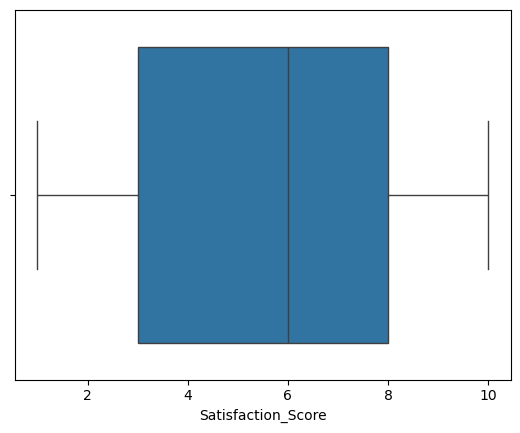

In [780]:
sns.boxplot(x=df['Satisfaction_Score'])
plt.show()

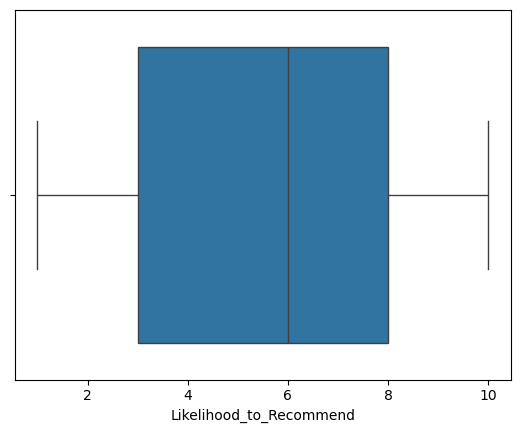

In [782]:
sns.boxplot(x=df['Likelihood_to_Recommend'])
plt.show()

In [784]:
unique_values = df['Likelihood_to_Recommend'].unique()
print(unique_values)

[ 9  3  1  4  7  2  5 10  6  8]


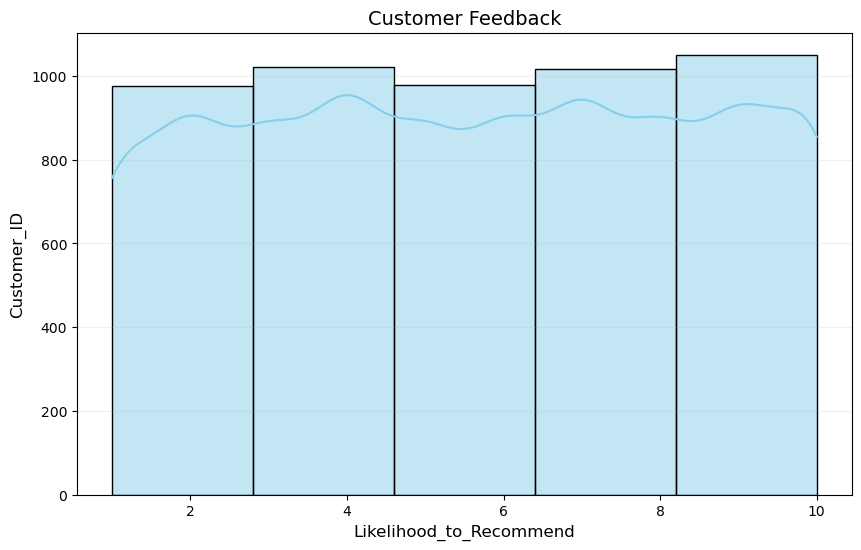

In [786]:
# Plot histogram with Kernel Density Estimate (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Likelihood_to_Recommend', kde=True, bins=5, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Customer Feedback', fontsize=14)
plt.xlabel('Likelihood_to_Recommend', fontsize=12)
plt.ylabel('Customer_ID', fontsize=12)
plt.grid(axis='y', alpha=0.2)

plt.show()

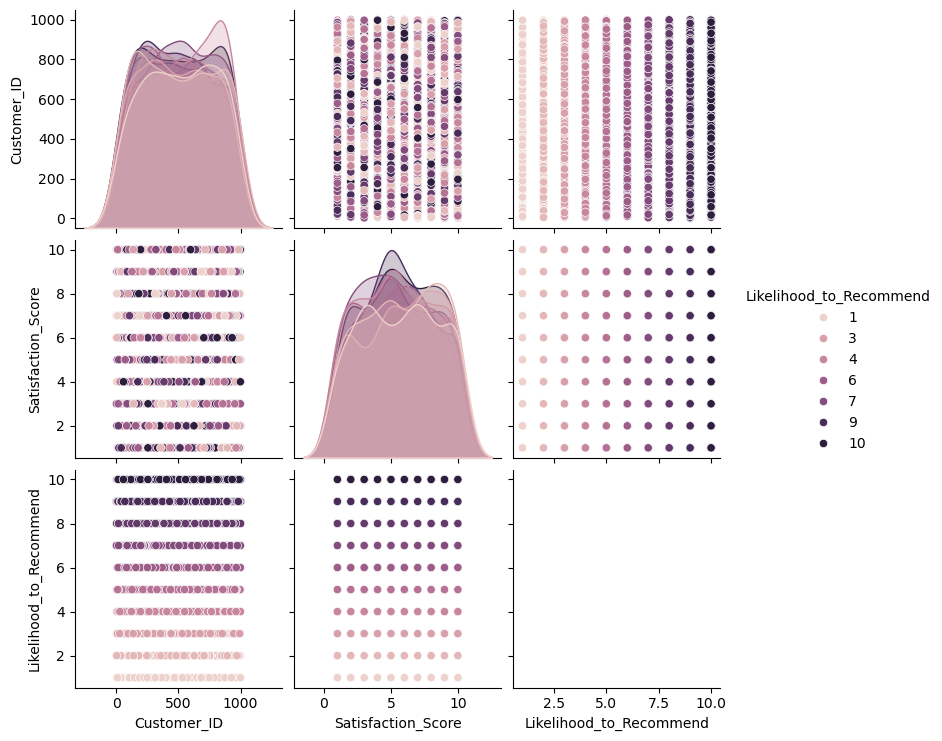

In [788]:
sns.pairplot(df, vars=['Customer_ID','Satisfaction_Score','Likelihood_to_Recommend'], hue='Likelihood_to_Recommend')
plt.show()

In [790]:
# Function to calculate Z-scores and detect outliers
def detect_outliers_zscore(df, numerical_columns, threshold=3):

    # Calculate Z-scores for specified numerical columns
    z_scores = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()
    
    # Add Z-scores to the DataFrame
    for col in numerical_columns:
        df[f'{col}_Z-Score'] = z_scores[col]
    
    # Identify outliers (absolute Z-score > threshold)
    outliers = df[(np.abs(z_scores) > threshold).any(axis=1)]
    
    return outliers

# Specify the numerical columns to analyze
numerical_columns = ['Likelihood_to_Recommend', 'Satisfaction_Score']  # Include both columns

# Detect outliers
outliers = detect_outliers_zscore(dff, numerical_columns, threshold=3)

# Print results
print("Original DataFrame:")
print(df.head())  # Display the first few rows of the original data
print("\nOutliers detected using Z-Score method:")
print(outliers)

Original DataFrame:
   Customer_ID  Satisfaction_Score  Likelihood_to_Recommend
0            1                10.0                        9
1            2                 3.0                        3
2            3                10.0                        1
3            4                 7.0                        4
4            5                 8.0                        7

Outliers detected using Z-Score method:
Empty DataFrame
Columns: [Customer_ID, Satisfaction_Score, Likelihood_to_Recommend, Likelihood_to_Recommend_Z-Score, Customer_ID_Z-Score, Satisfaction_Score_Z-Score]
Index: []


/var/folders/xj/jt0kl8cd6cz_vzpsfv0xrbkr0000gn/T/ipykernel_24204/3785068040.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_Z-Score'] = z_scores[col]


In [792]:
print(df.count())

Customer_ID                5040
Satisfaction_Score         5040
Likelihood_to_Recommend    5040
dtype: int64


In [794]:
# One-Hot Encoding for Satisfaction Score
Ttype_encoder = OneHotEncoder(sparse_output=False)
Ttype_encoded = Ttype_encoder.fit_transform(df[['Likelihood_to_Recommend']])

In [796]:
# Creating DataFrame for One-Hot Encoded Satisfaction Score
Ttype_df = pd.DataFrame(Ttype_encoded, columns=Ttype_encoder.get_feature_names_out(['Likelihood_to_Recommend']))

In [798]:
# Concatenating One-Hot Encoded satisfaction score with original DataFrame
df_encoded = pd.concat([df, Ttype_df], axis=1)

In [800]:
df_encoded

Customer_ID  Satisfaction_Score  Likelihood_to_Recommend  \
0             1.0                10.0                      9.0   
1             2.0                 3.0                      3.0   
2             3.0                10.0                      1.0   
3             4.0                 7.0                      4.0   
4             5.0                 8.0                      7.0   
...           ...                 ...                      ...   
3012          NaN                 NaN                      NaN   
3306          NaN                 NaN                      NaN   
4131          NaN                 NaN                      NaN   
4499          NaN                 NaN                      NaN   
4650          NaN                 NaN                      NaN   

      Likelihood_to_Recommend_1  Likelihood_to_Recommend_2  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           1.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
3012                        0.0                        0.0   
3306                        0.0                        0.0   
4131                        1.0                        0.0   
4499                        0.0                        0.0   
4650                        0.0                        0.0   

      Likelihood_to_Recommend_3  Likelihood_to_Recommend_4  \
0                           0.0                        0.0   
1                           1.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        1.0   
4                           0.0                        0.0   
...                         ...                        ...   
3012                        0.0                        1.0   
3306                        0.0                        0.0   
4131                        0.0                        0.0   
4499                        0.0                        0.0   
4650                        0.0                        1.0   

      Likelihood_to_Recommend_5  Likelihood_to_Recommend_6  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
3012                        0.0                        0.0   
3306                        0.0                        0.0   
4131                        0.0                        0.0   
4499                        0.0                        0.0   
4650                        0.0                        0.0   

      Likelihood_to_Recommend_7  Likelihood_to_Recommend_8  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           1.0                        0.0   
...                         ...                        ...   
3012                        0.0                        0.0   
3306                        0.0                        0.0   
4131                        0.0                        0.0   
4499                        0.0                        0.0   
4650                        0.0                        0.0   

      Likelihood_to_Recommend_9  Likelihood_to_Recommend_10  
0                           1.0                         0.0  
1                           0.0                         0.0  
2                           0.0                

In [802]:
df_clean = df_encoded.dropna()

In [804]:
print(df_clean.count())

Customer_ID                   5030
Satisfaction_Score            5030
Likelihood_to_Recommend       5030
Likelihood_to_Recommend_1     5030
Likelihood_to_Recommend_2     5030
Likelihood_to_Recommend_3     5030
Likelihood_to_Recommend_4     5030
Likelihood_to_Recommend_5     5030
Likelihood_to_Recommend_6     5030
Likelihood_to_Recommend_7     5030
Likelihood_to_Recommend_8     5030
Likelihood_to_Recommend_9     5030
Likelihood_to_Recommend_10    5030
dtype: int64


In [806]:
print(df_clean.isna().sum())

Customer_ID                   0
Satisfaction_Score            0
Likelihood_to_Recommend       0
Likelihood_to_Recommend_1     0
Likelihood_to_Recommend_2     0
Likelihood_to_Recommend_3     0
Likelihood_to_Recommend_4     0
Likelihood_to_Recommend_5     0
Likelihood_to_Recommend_6     0
Likelihood_to_Recommend_7     0
Likelihood_to_Recommend_8     0
Likelihood_to_Recommend_9     0
Likelihood_to_Recommend_10    0
dtype: int64


In [808]:
print(df_clean.isna().any().any())

False


In [810]:
df_clean.head()

Customer_ID  Satisfaction_Score  Likelihood_to_Recommend  \
0          1.0                10.0                      9.0   
1          2.0                 3.0                      3.0   
2          3.0                10.0                      1.0   
3          4.0                 7.0                      4.0   
4          5.0                 8.0                      7.0   

   Likelihood_to_Recommend_1  Likelihood_to_Recommend_2  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        1.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   Likelihood_to_Recommend_3  Likelihood_to_Recommend_4  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        1.0   
4                        0.0                        0.0   

   Likelihood_to_Recommend_5  Likelihood_to_Recommend_6  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   Likelihood_to_Recommend_7  Likelihood_to_Recommend_8  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        1.0                        0.0   

   Likelihood_to_Recommend_9  Likelihood_to_Recommend_10  
0                        1.0                         0.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0

In [812]:
print(df_clean.count())

Customer_ID                   5030
Satisfaction_Score            5030
Likelihood_to_Recommend       5030
Likelihood_to_Recommend_1     5030
Likelihood_to_Recommend_2     5030
Likelihood_to_Recommend_3     5030
Likelihood_to_Recommend_4     5030
Likelihood_to_Recommend_5     5030
Likelihood_to_Recommend_6     5030
Likelihood_to_Recommend_7     5030
Likelihood_to_Recommend_8     5030
Likelihood_to_Recommend_9     5030
Likelihood_to_Recommend_10    5030
dtype: int64


In [814]:
print(df_clean.isna().any().any())

False


In [816]:
df_clean.head()

Customer_ID  Satisfaction_Score  Likelihood_to_Recommend  \
0          1.0                10.0                      9.0   
1          2.0                 3.0                      3.0   
2          3.0                10.0                      1.0   
3          4.0                 7.0                      4.0   
4          5.0                 8.0                      7.0   

   Likelihood_to_Recommend_1  Likelihood_to_Recommend_2  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        1.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   Likelihood_to_Recommend_3  Likelihood_to_Recommend_4  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        1.0   
4                        0.0                        0.0   

   Likelihood_to_Recommend_5  Likelihood_to_Recommend_6  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   Likelihood_to_Recommend_7  Likelihood_to_Recommend_8  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        1.0                        0.0   

   Likelihood_to_Recommend_9  Likelihood_to_Recommend_10  
0                        1.0                         0.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0

In [818]:
# Selecting features for clustering (including encoded transaction types)
X = df_clean[['Customer_ID','Likelihood_to_Recommend','Satisfaction_Score', 
               'Likelihood_to_Recommend_1',
                'Likelihood_to_Recommend_2',
                'Likelihood_to_Recommend_3',
                'Likelihood_to_Recommend_4',
                'Likelihood_to_Recommend_5',
                'Likelihood_to_Recommend_6',
                'Likelihood_to_Recommend_7',
                'Likelihood_to_Recommend_8',
                'Likelihood_to_Recommend_9',
                'Likelihood_to_Recommend_10'
               ] + list(Ttype_df.columns)]

In [820]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [822]:
# Displaying first 5 rows of the scaled features
print("\nFirst 5 rows of scaled features:\n", X_scaled[:5])


First 5 rows of scaled features:
 [[-1.73432269  1.1948992   1.57861779 -0.32029141 -0.33443672 -0.32479918
  -0.3449944  -0.3255467  -0.33000989 -0.34210099 -0.32815474  2.9737929
  -0.34607583 -0.32029141 -0.33443672 -0.32479918 -0.3449944  -0.3255467
  -0.33000989 -0.34210099 -0.32815474  2.9737929  -0.34607583]
 [-1.73085881 -0.8950491  -0.9182661  -0.32029141 -0.33443672  3.07882553
  -0.3449944  -0.3255467  -0.33000989 -0.34210099 -0.32815474 -0.33627089
  -0.34607583 -0.32029141 -0.33443672  3.07882553 -0.3449944  -0.3255467
  -0.33000989 -0.34210099 -0.32815474 -0.33627089 -0.34607583]
 [-1.72739494 -1.59169853  1.57861779  3.12215683 -0.33443672 -0.32479918
  -0.3449944  -0.3255467  -0.33000989 -0.34210099 -0.32815474 -0.33627089
  -0.34607583  3.12215683 -0.33443672 -0.32479918 -0.3449944  -0.3255467
  -0.33000989 -0.34210099 -0.32815474 -0.33627089 -0.34607583]
 [-1.72393106 -0.54672438  0.50852469 -0.32029141 -0.33443672 -0.32479918
   2.89859779 -0.3255467  -0.33000989 -0

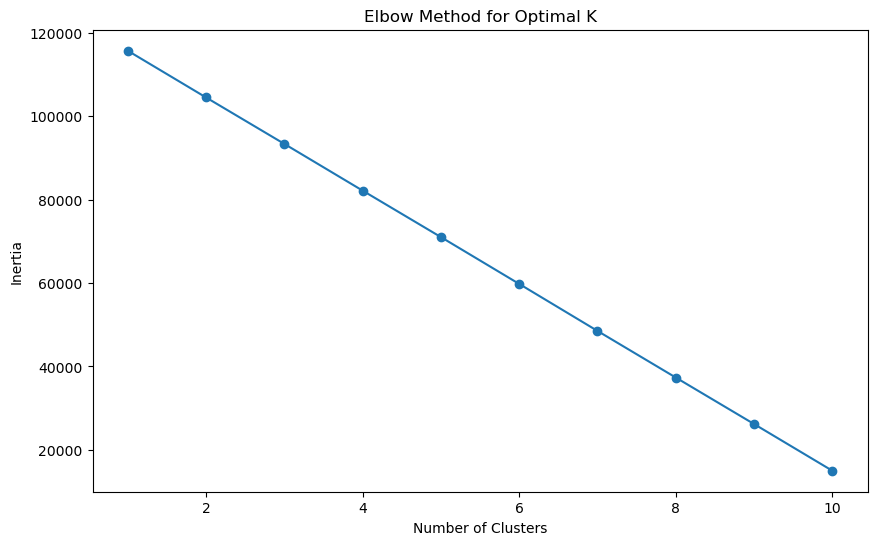

In [824]:
# Determining optimal K using Elbow Method
inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Method Graph
plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [828]:
# Applying K-Means with optimal K 
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluating K-Means
silhouette_kmeans = silhouette_score(X_scaled, df_clean['KMeans_Cluster'])
calinski_kmeans = calinski_harabasz_score(X_scaled, df_clean['KMeans_Cluster'])

print(f'K-Means Silhouette Score: {silhouette_kmeans}')
print(f'K-Means Calinski-Harabasz Score: {calinski_kmeans}')

/var/folders/xj/jt0kl8cd6cz_vzpsfv0xrbkr0000gn/T/ipykernel_24204/3973182577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


K-Means Silhouette Score: 0.26848670666563285
K-Means Calinski-Harabasz Score: 683.8619303372456


/var/folders/xj/jt0kl8cd6cz_vzpsfv0xrbkr0000gn/T/ipykernel_24204/158984653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['KMeans_Cluster'] = kmeans.fit_predict(df_clean[['Customer_ID', 'Likelihood_to_Recommend']])


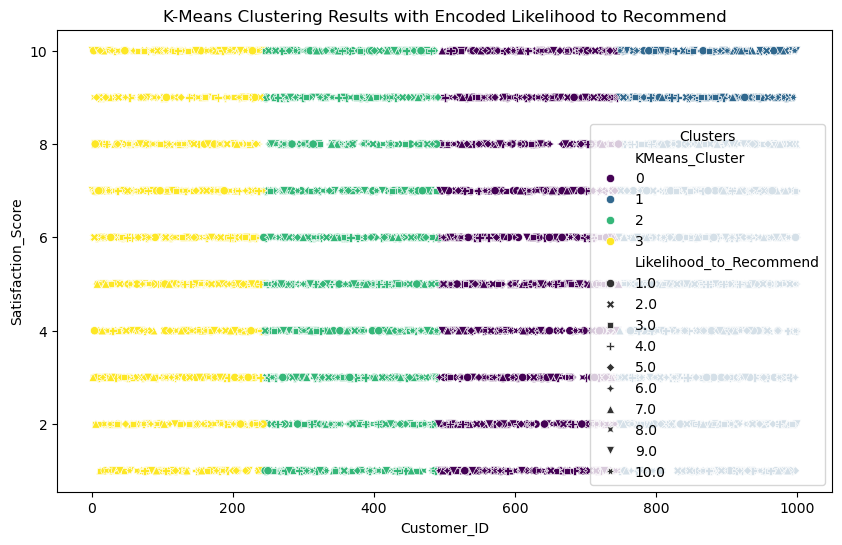

In [840]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['KMeans_Cluster'] = kmeans.fit_predict(df_clean[['Customer_ID', 'Likelihood_to_Recommend']])

# Plotting K-Means Clusters with encoded preferences
plt.figure(figsize=(10, 6))

# Scatter plot for Age vs Income
sns.scatterplot(x='Customer_ID', y='Satisfaction_Score', hue='KMeans_Cluster', style='Likelihood_to_Recommend',
                palette='viridis', data=df_clean) #The marker differentiation ONLY APPLIES TO CATEGORICAL FEATURES, advisable to 2-5 distinct categories.

# Adding title and labels
plt.title('K-Means Clustering Results with Encoded Likelihood to Recommend')
plt.xlabel('Customer_ID')
plt.ylabel('Satisfaction_Score')
plt.legend(title="Clusters")
plt.show()

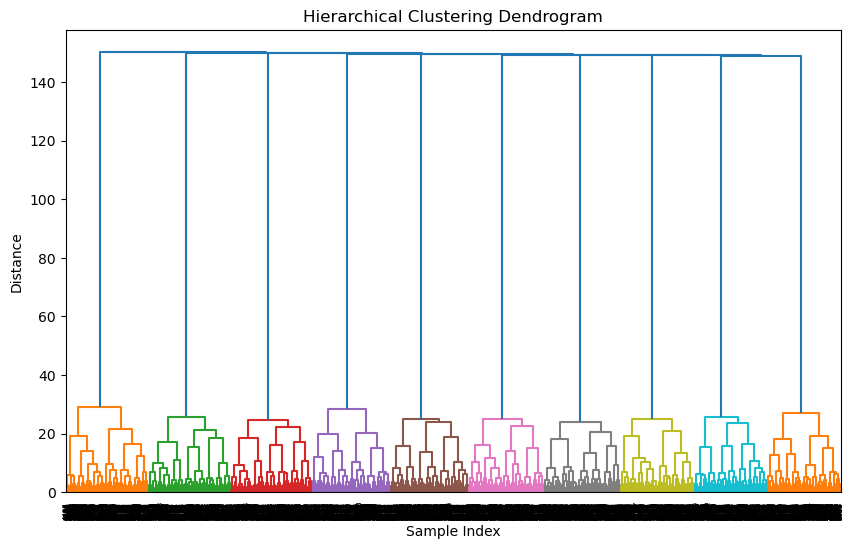

In [842]:
# Applying Hierarchical Clustering
# Generate the linkage matrix (this is where the hierarchical merging happens)
Z = linkage(X_scaled, method='ward')  # 'ward' minimizes variance within clusters

# Plot the dendrogram to visually inspect the number of clusters
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [852]:
# Apply Hierarchical Clustering with the chosen number of clusters
hier_cluster = AgglomerativeClustering(n_clusters=5)  # Change this number based on your observation
df_clean['Hier_Cluster'] = hier_cluster.fit_predict(X_scaled)

# Evaluating Hierarchical Clustering
silhouette_hier = silhouette_score(X_scaled, df_clean['Hier_Cluster'])
calinski_hier = calinski_harabasz_score(X_scaled, df_clean['Hier_Cluster'])

print(f'Hierarchical Silhouette Score: {silhouette_hier}')
print(f'Hierarchical Calinski-Harabasz Score: {calinski_hier}')

/var/folders/xj/jt0kl8cd6cz_vzpsfv0xrbkr0000gn/T/ipykernel_24204/2961920320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Hier_Cluster'] = hier_cluster.fit_predict(X_scaled)


Hierarchical Silhouette Score: 0.33666971721679273
Hierarchical Calinski-Harabasz Score: 798.6886215381606


In [854]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clean['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Evaluating DBSCAN
unique_labels = len(set(df_clean['DBSCAN_Cluster']))
print(f'Number of clusters identified by DBSCAN: {unique_labels}')

Number of clusters identified by DBSCAN: 46


/var/folders/xj/jt0kl8cd6cz_vzpsfv0xrbkr0000gn/T/ipykernel_24204/1870559993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
